In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
pe = [[[]],[[]],[[]],[[]],[[]],[[]],[[]],[[]],[[]],[[]]]
for i in range(10):
    with open('partialestimates'+str(i)+'.csv') as f:
        pe[i] = pe[i] + [[float(x) for x in line.split(',')] for line in f] 
    pe[i] = pe[i][1:]

### Plot an evolution for every value of N

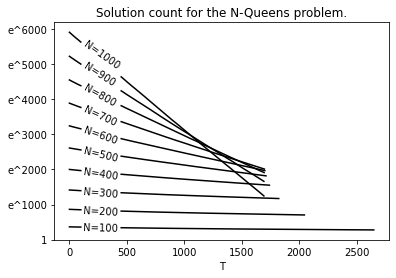

In [4]:
# Plot first evolution for every value of N
fig, ax = plt.subplots()
NUM_UNKNOWN = len(pe)
GAP = 350
START = 100
for l in range(NUM_UNKNOWN):
    T = len(pe[l][0])
    x, y   = np.arange(1, T+1), pe[l][0]
    x1, x2 = x[:START], x[START+GAP:]
    y1, y2 = y[:START], y[START+GAP:]
    
    angle = np.arctan((y[START+GAP]-y[START]) / (x[START+GAP]-x[START])) * 180 / (2 * np.pi)
    ax.annotate("N={0:d}".format((l+1) * 100),
      xy     = (      x[START], y[START]),
      xytext = (1.2 * x[START], y[START] - 100),
      color  = 'black',
      rotation = angle,
      rotation_mode='anchor'
    )
    
    plt.plot(x1,y1,color='black')
    plt.plot(x2,y2,color='black')
ax.set_xlabel("T")
newylabels = ['0','1']+['e^'+str(y)[:4] for y in ax.get_yticks()[2:]]
ax.set_yticklabels(newylabels)
plt.title("Solution count for the N-Queens problem.")
plt.show()

### Plot all evolutions for N=1000

In [5]:
mpe = np.array(pe[-1])
mpe.shape

(44, 1691)

In [9]:
# calculate error bars
error = np.std(mpe, axis=0)
means = np.mean(mpe, axis=0)
len(means)

1691

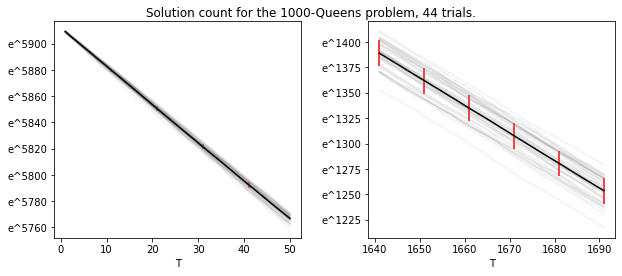

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(9)
K = len(mpe)
FROM = -50
offset = -1
for k in range(K):
    T = len(mpe[k])
    x, y   = np.arange(1, T+1), mpe[k]
    
    # Subplot 1
    ax1.plot(x[:-FROM],y[:-FROM],color='grey', alpha=0.1)

    
    # Subplot 2
    ax2.plot(x[FROM+offset:],y[FROM+offset:],color='grey', alpha=0.1)

# Plot means and errors
x, y = np.arange(1, len(means)+1), means
ax1.plot(x[:-FROM],y[:-FROM],color='black')
ax2.plot(x[FROM+offset:],y[FROM+offset:],color='black')
ax1.errorbar(x[:-FROM],y[:-FROM], yerr =error[:-FROM], xerr=None, fmt='none', color='red', errorevery=10)
ax2.errorbar(x[FROM+offset:],y[FROM+offset:], yerr =error[FROM+offset:], xerr=None, fmt='none', color='red', errorevery=10)
    
# Annotate errors
ax1.set_xlabel("T")
ax2.set_xlabel("T")

newylabels1 = ['e^'+str(y)[:4] for y in ax1.get_yticks()]
ax1.set_yticklabels(newylabels1)
newylabels2 = ['e^'+str(y)[:4] for y in ax2.get_yticks()]
ax2.set_yticklabels(newylabels2)
fig.tight_layout(pad=2.0)
fig.suptitle("Solution count for the 1000-Queens problem, {0:d} trials.".format(len(mpe)))
plt.show()

### Plot errors for all values of N, all values of T

In [14]:
errors_all = [np.std(pe[i], axis=0) for i in range(10)]

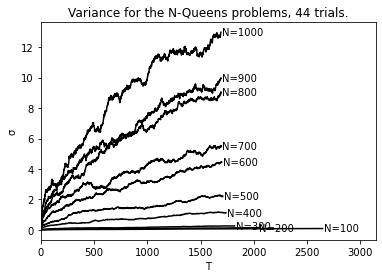

In [15]:
# Plot first evolution for every value of N
fig, ax = plt.subplots()
NUM_UNKNOWN = len(pe)
for l in range(NUM_UNKNOWN):
    T = len(errors_all[l])
    x, y   = np.arange(1, T+1), errors_all[l]
    x1, x2 = x[:START], x[START+GAP:]
    y1, y2 = y[:START], y[START+GAP:]
    angle = np.arctan((y2[0]-y1[-1]) / (x2[0]-x1[-1])) * 180
    ax.annotate("N={0:d}".format((l+1) * 100),
      xy     = (      x[-1], y[-1]),
      xytext = (x[-1]+10, y[-1]-0.2),
      color  = 'black',
      rotation = 0,
      rotation_mode='anchor')
    
    plt.plot(x,y,color='black')
ax.set_ylabel("σ")
ax.set_xlabel("T")
plt.xlim([0,500+max([len(errors) for errors in errors_all])])
plt.title("Variance for the N-Queens problems, {0:d} trials.".format(len(mpe)))
plt.show()

In [290]:
print("""After T iterations, the standard deviations
of the number of solutions""")
for i, errors in enumerate(errors_all):
    print("N =",(i+1)*100, "| σ = ",errors[-1])

After T iterations, the standard deviations
of the number of solutions
N = 100 | σ =  0.09962727703206226
N = 200 | σ =  0.15786825436390048
N = 300 | σ =  0.2957748687400238
N = 400 | σ =  1.1760075407553885
N = 500 | σ =  2.2536679480697868
N = 600 | σ =  3.6875476315181115
N = 700 | σ =  5.534335254517169
N = 800 | σ =  9.131492225364157
N = 900 | σ =  9.598911086339033
N = 1000 | σ =  13.343656642804833
